## Figure - Impact of bulk plate motion on the `asc/dsc to horz/vert` decomposition

In [1]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
from cartopy import crs as ccrs, feature as cfeature
from mintpy.utils import readfile, utils as ut, plot as pp
from mintpy import view, asc_desc2horz_vert
plt.rcParams.update({'font.size': 12, 'font.family':'Helvetica'})

work_dir = os.path.expanduser('~/Papers/Coauthor/2022-Stephenson-PlateMotion')
os.chdir(work_dir)
print('Go to directory:', work_dir)

data_dir = os.path.join(work_dir, 'data/Makran')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ykliu/Papers/Coauthor/2022-Stephenson-PlateMotion'

## Run decomposition

In [12]:
re_generate = False
if re_generate:
    os.chdir(data_dir)
    !asc_desc2horz_vert.py vel_los_a86.h5      vel_los_d20_msk.h5      -g geom_a86.h5 geom_d20.h5 --oo vel_hv.h5
    !asc_desc2horz_vert.py vel_los_a86_itrf.h5 vel_los_d20_itrf_msk.h5 -g geom_a86.h5 geom_d20.h5 --oo vel_hv_itrf.h5
    os.chdir(work_dir)

setenv: Variable name must contain alphanumeric characters.
overlaping area in SNWE: (25.10125, 32.00125, 58.50875, 62.12375)
read  from file: vel_los_a86.h5
read 2D LOS incidence / azimuth angles from file: geom_a86.h5
read  from file: vel_los_d20_msk.h5
read 2D LOS incidence / azimuth angles from file: geom_d20.h5
---------------------
decomposing asc/desc into horz/vert direction in windows of 20x20 ...
/Users/yunjunz/tools/miniconda3/envs/insar/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
[==================================================] 42/42    0s /     0s
---------------------
write asc/desc/horz/vert datasets into vel_hv.h5
create HDF5 file: vel_hv.h5 with w mode
create dataset /SenAT86_20141023_20210401 of float32    in size of (828, 434)           with compression=None
create dataset /SenDT20_20141007_20210328 of float32    in size of (828, 434) 

## Plot

In [46]:
# input files
hv_file = os.path.join(data_dir, 'vel_hv.h5')
hv_itrf_file = os.path.join(data_dir, 'vel_hv_itrf.h5')
dem_file = os.path.join(data_dir, 'srtm_d20.dem')

# input datasets and view.py options
dset_strs = [
    f'view.py {hv_file}      horizontal --figtitle Quasi-east     --lalo-loc 1 0 0 1',
    f'view.py {hv_file}      vertical   --figtitle Quasi-vertical --lalo-loc 0 0 0 1',
    f'view.py {hv_itrf_file} horizontal --figtitle Quasi-east     --lalo-loc 0 0 0 1',
    f'view.py {hv_itrf_file} vertical   --figtitle Quasi-vertical --lalo-loc 0 0 0 1',
]
cmd_base = ' -u mm/year -v -5 5 -c RdYlBu --lalo-label --nocbar --ref-lalo 28.58 60.46 '
cmd_base += ' --noscalebar --fontsize 12 --ref-size 2 --coastline 10m --coastline-lw 0.5 --lalo-step 4 --lalo-off -30 -14 --lalo-fs 10 '
cmd_base += f' --dem {dem_file} --dem-nocontour --shade-min -4000 --shade-max 6000 --shade-exag 0.02 '
cmd_base += ' --noverbose '

view.py /Users/yunjunz/Papers/Coauthor/2022-Stephenson-PlateMotion/data/Makran/vel_hv.h5 horizontal --figtitle Quasi-east --lalo-loc 1 0 0 1 -u mm/year -v -5 5 -c RdYlBu --lalo-label --nocbar --ref-lalo 28.58 60.46 --noscalebar --fontsize 12 --ref-size 2 --coastline 10m --coastline-lw 0.5 --lalo-step 4 --lalo-off -30 -14 --lalo-fs 10 --dem /Users/yunjunz/Papers/Coauthor/2022-Stephenson-PlateMotion/data/Makran/srtm_d20.dem --dem-nocontour --shade-min -4000 --shade-max 6000 --shade-exag 0.02 --noverbose
min/max [mm/year]: -5.3, 13.7
view.py /Users/yunjunz/Papers/Coauthor/2022-Stephenson-PlateMotion/data/Makran/vel_hv.h5 vertical --figtitle Quasi-vertical --lalo-loc 0 0 0 1 -u mm/year -v -5 5 -c RdYlBu --lalo-label --nocbar --ref-lalo 28.58 60.46 --noscalebar --fontsize 12 --ref-size 2 --coastline 10m --coastline-lw 0.5 --lalo-step 4 --lalo-off -30 -14 --lalo-fs 10 --dem /Users/yunjunz/Papers/Coauthor/2022-Stephenson-PlateMotion/data/Makran/srtm_d20.dem --dem-nocontour --shade-min -4000 -

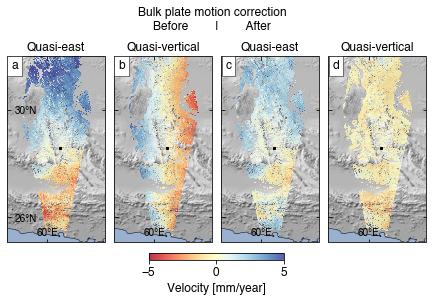

In [50]:
# plot
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, axs = plt.subplots(figsize=[7.5, 4.5], nrows=1, ncols=4, subplot_kw=subplot_kw)
for ax, dset_str in zip(axs, dset_strs):
    data, atr, inps = view.prep_slice(dset_str + cmd_base)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
    ax.add_feature(cfeature.OCEAN, zorder=.5, alpha=.7)
    ax.add_feature(cfeature.LAKES, zorder=.5, alpha=.7)
    print(f'min/max [mm/year]: {np.nanmin(data):.1f}, {np.nanmax(data):.1f}')
fig.subplots_adjust(wspace=0.1)

# common titles
msg =    'Bulk plate motion correction'
msg += '\nBefore        |        After'
fig.suptitle(msg, x=0.504, y=0.94, fontsize=12)
# subplot index
for ax, num in zip(axs, ['a', 'b', 'c', 'd']):
    ax.annotate(num, xy=(0.043, 0.932), xycoords='axes fraction', bbox=dict(facecolor='w', edgecolor='k', lw=0.5))

# colorbar
cax = fig.add_axes([0.387, 0.16, 0.25, 0.02])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Velocity [mm/year]')

# output
out_fig = os.path.join(work_dir, 'docs/asc_dsc2hv_comp.png')
print('save figure to file:', out_fig)
fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()